In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')   #train데이터 불러오기
train_df

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [48]:
def preprocess_data(data):

    temp = data.copy()
    temp = temp[['Hour', 'Minute', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]    # Day열을 제외한 열을 저장
    temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')    # 1일 후를 예측하기 위해 데이터를 하루(48행) 앞당기고 남는 행에 NaN값 채워줌
    temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')    # 2일 후를 예측하기 위해 데이터를 이틀(96행) 앞당기고 남는 행에 NaN값 채워줌
    temp = temp.dropna()

    return temp.iloc[:-96]    # 끝에서 96번째 데이터까지는 Target2 열에 NaN값이 저장되어 있어 그걸 제외한 데이터들만 반환함

# train데이터 전처리
df_train = preprocess_data(train_df)
df_train.iloc[:48]
# DHI: 수평면 산란 일사량, DNI: 법선면 직달 일사량, T: 온도, WS: 풍속, RH: 상대습도

,Hour,Minute,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000
1,0,30,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000
2,1,0,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000
3,1,30,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000
4,2,0,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000
5,2,30,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000
6,3,0,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000
7,3,30,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000
8,4,0,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000
9,4,30,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000


Text(0.5, 1.0, 'Correlation Heatmap')

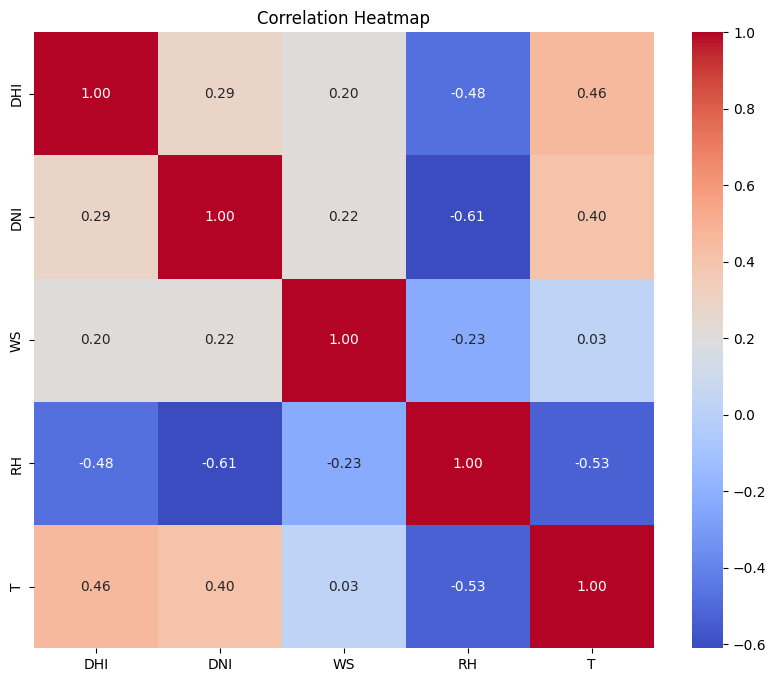

In [49]:
corr_matrix = df_train[['DHI', 'DNI', 'WS', 'RH', 'T']].corr()  # 상관계수 계산
plt.figure(figsize=(10, 8))  # 도화지 만들고
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # heatmap 그리기
# (annot는 주석, cmap은 히트맵의 색깔, fmt는 소수점 몇번째 자리까지 표시)
plt.title('Correlation Heatmap')

#RH DNI T 간의 산점도를 그려보자

<Axes: xlabel='RH', ylabel='DNI'>

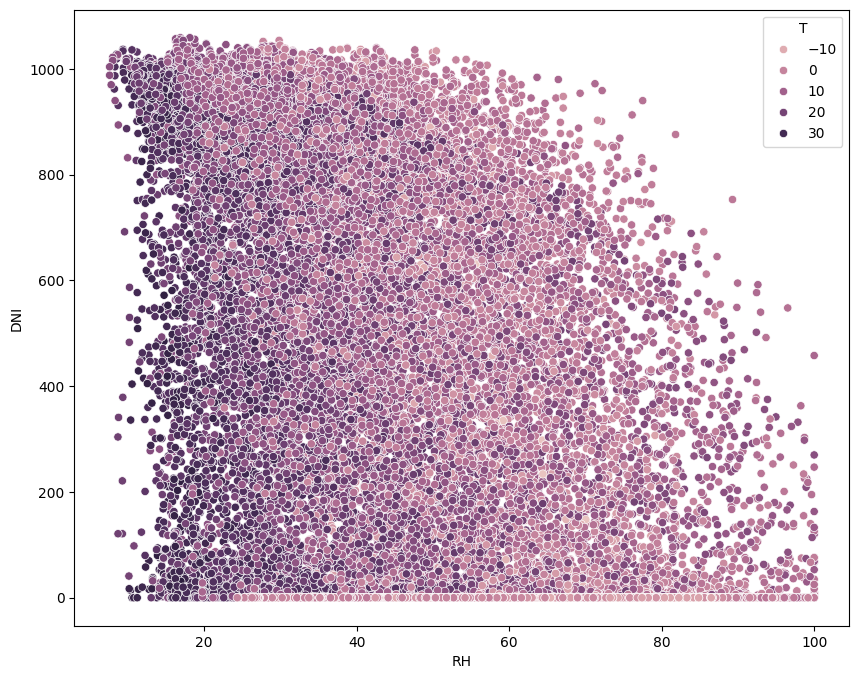

In [50]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_train,x ='RH',y='DNI',hue='T')
# RH, T의 연관성 높아보인다.
# DNI와 DHI를 합한 지표인 GHI 데이터가 TARGET과 상관관계가 높을 것이라 예상하여 GHI 데이터 생성을 시도함
# GHI = DHI + DNI * cos(고도)
# 정확한 고도를 파악하는 데 어려움이 있어 pi/(일몰시간-일출시간)-pi/2로 활용함

In [51]:
df_train

,Hour,Minute,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0,0,0.0,0,0,1.5,69.08,-12,0.0,0.0
1,0,30,0.0,0,0,1.5,69.06,-12,0.0,0.0
2,1,0,0.0,0,0,1.6,71.78,-12,0.0,0.0
3,1,30,0.0,0,0,1.6,71.75,-12,0.0,0.0
4,2,0,0.0,0,0,1.6,75.20,-12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52459,21,30,0.0,0,0,3.5,55.97,-1,0.0,0.0
52460,22,0,0.0,0,0,3.9,54.23,-2,0.0,0.0
52461,22,30,0.0,0,0,4.1,54.21,-2,0.0,0.0
52462,23,0,0.0,0,0,4.3,56.46,-2,0.0,0.0


In [52]:
# Minute을 Hour 단위로 변환한 후 Hour에 합쳐 time이라는 새로운 변수를 생성하고 Hour과 Minute열을 삭제함
df_train.loc[df_train['Minute'] == 30, 'Minute'] = 0.5
df_train['Hour'] = df_train['Hour'].astype(float)
df_train['Minute'] = df_train['Minute'].astype(float)
df_train['time'] = df_train['Hour'] + df_train['Minute']
df_train = df_train.drop('Hour', axis = 1)
df_train = df_train.drop('Minute', axis = 1)
df_train

,TARGET,DHI,DNI,WS,RH,T,Target1,Target2,time
0,0.0,0,0,1.5,69.08,-12,0.0,0.0,0.0
1,0.0,0,0,1.5,69.06,-12,0.0,0.0,0.5
2,0.0,0,0,1.6,71.78,-12,0.0,0.0,1.0
3,0.0,0,0,1.6,71.75,-12,0.0,0.0,1.5
4,0.0,0,0,1.6,75.20,-12,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
52459,0.0,0,0,3.5,55.97,-1,0.0,0.0,21.5
52460,0.0,0,0,3.9,54.23,-2,0.0,0.0,22.0
52461,0.0,0,0,4.1,54.21,-2,0.0,0.0,22.5
52462,0.0,0,0,4.3,56.46,-2,0.0,0.0,23.0


In [53]:
df_sunrise = []   # 일출, 일몰 시간을 담기위한 list 생성
df_sunset = []

# TARGET열의 값이 0을 초과하는 시점의 Time 값을 sunrise list에 저장하고 다시 0이 되는 시점의 Time 값을 sunset list에 저장
i = 0  # 반복 변수 초기화

while i < len(df_train):
    if df_train.loc[i, 'TARGET'] > 0:
        df_sunrise.append(df_train.loc[i, 'time'])
        for k in range(i, i+48):
            if k < len(df_train) and df_train.loc[k, 'TARGET'] == 0:
                df_sunset.append(df_train.loc[k, 'time'])
                i = k - 1  # i를 k-1로 변경
                break
    i += 1  # 반복 변수 증가

print(df_sunrise)
print(df_sunset)

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.0, 6.0, 6.0, 6.0, 6.5, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,

In [54]:
# 일출 일몰 list를 데이터프레임으로 전환 후 병합하여 데이터프레임을 생성
df_sunrise = pd.DataFrame(df_sunrise)
df_sunrise.columns = ['sunrise']
df_sunset = pd.DataFrame(df_sunset)
df_sunset.columns = ['sunset']
merged = df_sunrise.join(df_sunset, how= 'left')
merged

,sunrise,sunset
0,8.0,17.0
1,8.0,17.0
2,8.0,17.0
3,8.0,17.0
4,8.0,17.0
...,...,...
1088,8.0,17.0
1089,8.0,17.0
1090,8.0,17.0
1091,8.0,17.0


In [55]:
# 해가 떠있는 시간인 on열을 생성하고 불필요한 sunset열을 삭제
merged['on'] = merged['sunset'] - merged['sunrise']
merged = merged.drop('sunset', axis=1)
merged

,sunrise,on
0,8.0,9.0
1,8.0,9.0
2,8.0,9.0
3,8.0,9.0
4,8.0,9.0
...,...,...
1088,8.0,9.0
1089,8.0,9.0
1090,8.0,9.0
1091,8.0,9.0


In [56]:
# 새로운 데이터프레임 생성을 위한 빈 리스트 생성
new_rows = []

for i in range(len(merged)):
    # 행을 48번 반복하여 하루(48행)동안의 일출 일몰 시간을 복제해서 리스트에 추가
    for j in range(48):
        new_rows.append(merged.iloc[i])

# 새로운 데이터프레임 생성
new_df = pd.DataFrame(new_rows)

# 결과 확인
new_df

,sunrise,on
0,8.0,9.0
0,8.0,9.0
0,8.0,9.0
0,8.0,9.0
0,8.0,9.0
...,...,...
1092,8.0,9.0
1092,8.0,9.0
1092,8.0,9.0
1092,8.0,9.0


In [57]:
# 인덱스 재설정
new_df = new_df.reset_index(drop=True)
new_df

,sunrise,on
0,8.0,9.0
1,8.0,9.0
2,8.0,9.0
3,8.0,9.0
4,8.0,9.0
...,...,...
52459,8.0,9.0
52460,8.0,9.0
52461,8.0,9.0
52462,8.0,9.0


In [58]:
#고도 계산에 활용하기 위한 the 생성
new_df['the'] = np.pi / new_df['on']
new_df

,sunrise,on,the
0,8.0,9.0,0.349066
1,8.0,9.0,0.349066
2,8.0,9.0,0.349066
3,8.0,9.0,0.349066
4,8.0,9.0,0.349066
...,...,...,...
52459,8.0,9.0,0.349066
52460,8.0,9.0,0.349066
52461,8.0,9.0,0.349066
52462,8.0,9.0,0.349066


In [59]:
# 기존 데이터프레임에 병합
df = df_train.join(new_df, how='left')
df

,TARGET,DHI,DNI,WS,RH,T,Target1,Target2,time,sunrise,on,the
0,0.0,0,0,1.5,69.08,-12,0.0,0.0,0.0,8.0,9.0,0.349066
1,0.0,0,0,1.5,69.06,-12,0.0,0.0,0.5,8.0,9.0,0.349066
2,0.0,0,0,1.6,71.78,-12,0.0,0.0,1.0,8.0,9.0,0.349066
3,0.0,0,0,1.6,71.75,-12,0.0,0.0,1.5,8.0,9.0,0.349066
4,0.0,0,0,1.6,75.20,-12,0.0,0.0,2.0,8.0,9.0,0.349066
...,...,...,...,...,...,...,...,...,...,...,...,...
52459,0.0,0,0,3.5,55.97,-1,0.0,0.0,21.5,8.0,9.0,0.349066
52460,0.0,0,0,3.9,54.23,-2,0.0,0.0,22.0,8.0,9.0,0.349066
52461,0.0,0,0,4.1,54.21,-2,0.0,0.0,22.5,8.0,9.0,0.349066
52462,0.0,0,0,4.3,56.46,-2,0.0,0.0,23.0,8.0,9.0,0.349066


In [60]:
# 지금까지 구한 값들을 활용해서 GHI(전체수평복사량)를 계산하고 TARGET값이 0인 경우에는 cos값이 0이므로 값을 그 값을 0으로 하여 GHI 생성
df['GHI'] = df['DHI'] + df['DNI']*np.cos(df['the']*(df['time']-df['sunrise']) - (np.pi/2))
df.loc[df['TARGET'] == 0, 'GHI'] = 0
df

,TARGET,DHI,DNI,WS,RH,T,Target1,Target2,time,sunrise,on,the,GHI
0,0.0,0,0,1.5,69.08,-12,0.0,0.0,0.0,8.0,9.0,0.349066,0.0
1,0.0,0,0,1.5,69.06,-12,0.0,0.0,0.5,8.0,9.0,0.349066,0.0
2,0.0,0,0,1.6,71.78,-12,0.0,0.0,1.0,8.0,9.0,0.349066,0.0
3,0.0,0,0,1.6,71.75,-12,0.0,0.0,1.5,8.0,9.0,0.349066,0.0
4,0.0,0,0,1.6,75.20,-12,0.0,0.0,2.0,8.0,9.0,0.349066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52459,0.0,0,0,3.5,55.97,-1,0.0,0.0,21.5,8.0,9.0,0.349066,0.0
52460,0.0,0,0,3.9,54.23,-2,0.0,0.0,22.0,8.0,9.0,0.349066,0.0
52461,0.0,0,0,4.1,54.21,-2,0.0,0.0,22.5,8.0,9.0,0.349066,0.0
52462,0.0,0,0,4.3,56.46,-2,0.0,0.0,23.0,8.0,9.0,0.349066,0.0


In [61]:
# 열 순서 재정렬
df = df.reindex(columns=['time','GHI', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T', 'Target1', 'Target2' , 'sunrise', 'on', 'the'])
df

,time,GHI,TARGET,DHI,DNI,WS,RH,T,Target1,Target2,sunrise,on,the
0,0.0,0.0,0.0,0,0,1.5,69.08,-12,0.0,0.0,8.0,9.0,0.349066
1,0.5,0.0,0.0,0,0,1.5,69.06,-12,0.0,0.0,8.0,9.0,0.349066
2,1.0,0.0,0.0,0,0,1.6,71.78,-12,0.0,0.0,8.0,9.0,0.349066
3,1.5,0.0,0.0,0,0,1.6,71.75,-12,0.0,0.0,8.0,9.0,0.349066
4,2.0,0.0,0.0,0,0,1.6,75.20,-12,0.0,0.0,8.0,9.0,0.349066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52459,21.5,0.0,0.0,0,0,3.5,55.97,-1,0.0,0.0,8.0,9.0,0.349066
52460,22.0,0.0,0.0,0,0,3.9,54.23,-2,0.0,0.0,8.0,9.0,0.349066
52461,22.5,0.0,0.0,0,0,4.1,54.21,-2,0.0,0.0,8.0,9.0,0.349066
52462,23.0,0.0,0.0,0,0,4.3,56.46,-2,0.0,0.0,8.0,9.0,0.349066


In [62]:
# 불필요한 세 개의 열 삭제
col = ['sunrise', 'on', 'the']
df = df.drop(col, axis=1)
df

,time,GHI,TARGET,DHI,DNI,WS,RH,T,Target1,Target2
0,0.0,0.0,0.0,0,0,1.5,69.08,-12,0.0,0.0
1,0.5,0.0,0.0,0,0,1.5,69.06,-12,0.0,0.0
2,1.0,0.0,0.0,0,0,1.6,71.78,-12,0.0,0.0
3,1.5,0.0,0.0,0,0,1.6,71.75,-12,0.0,0.0
4,2.0,0.0,0.0,0,0,1.6,75.20,-12,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
52459,21.5,0.0,0.0,0,0,3.5,55.97,-1,0.0,0.0
52460,22.0,0.0,0.0,0,0,3.9,54.23,-2,0.0,0.0
52461,22.5,0.0,0.0,0,0,4.1,54.21,-2,0.0,0.0
52462,23.0,0.0,0.0,0,0,4.3,56.46,-2,0.0,0.0


In [63]:
df.columns

Index(['time', 'GHI', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T', 'Target1',
       'Target2'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

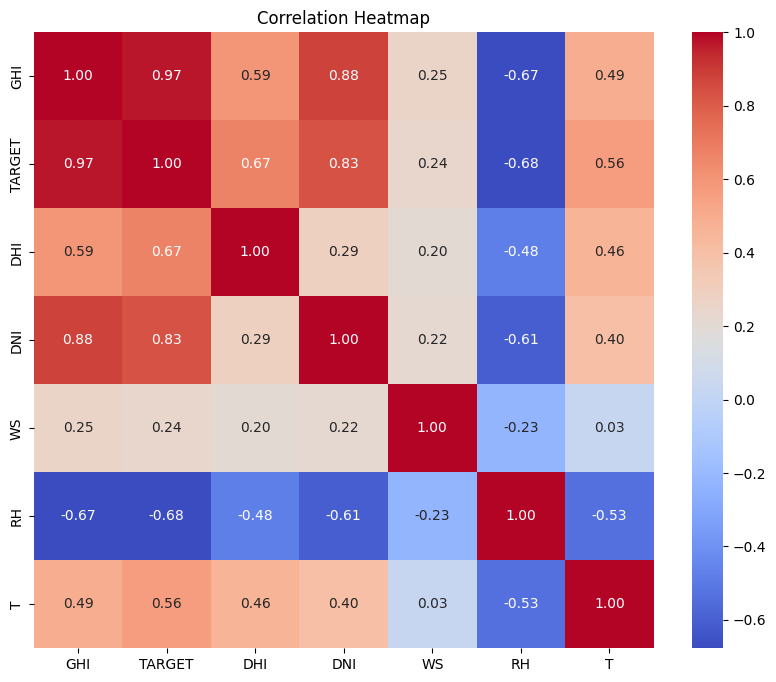

In [64]:
corr_matrix = df[['GHI', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']].corr()  # 상관계수 계산
plt.figure(figsize=(10, 8))  # 도화지 만들고
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # heatmap 그리기
# (annot는 주석, cmap은 히트맵의 색깔, fmt는 소수점 몇번째 자리까지 표시)
plt.title('Correlation Heatmap')
# GHI TARGET DNI 간의 높은 상관관계를 확인

<Axes: xlabel='RH', ylabel='TARGET'>

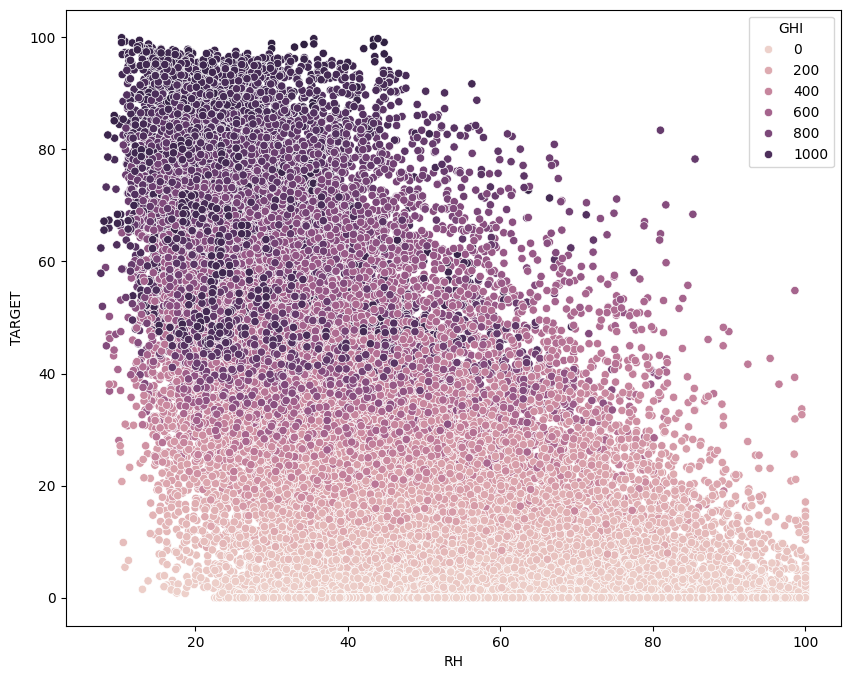

In [65]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='RH',y='TARGET',hue='GHI')
# TARGET과 GHI간의 양의 상관관계 확인
# TARGET과 RH간의 음의 상관관계 확인

<Axes: xlabel='GHI', ylabel='TARGET'>

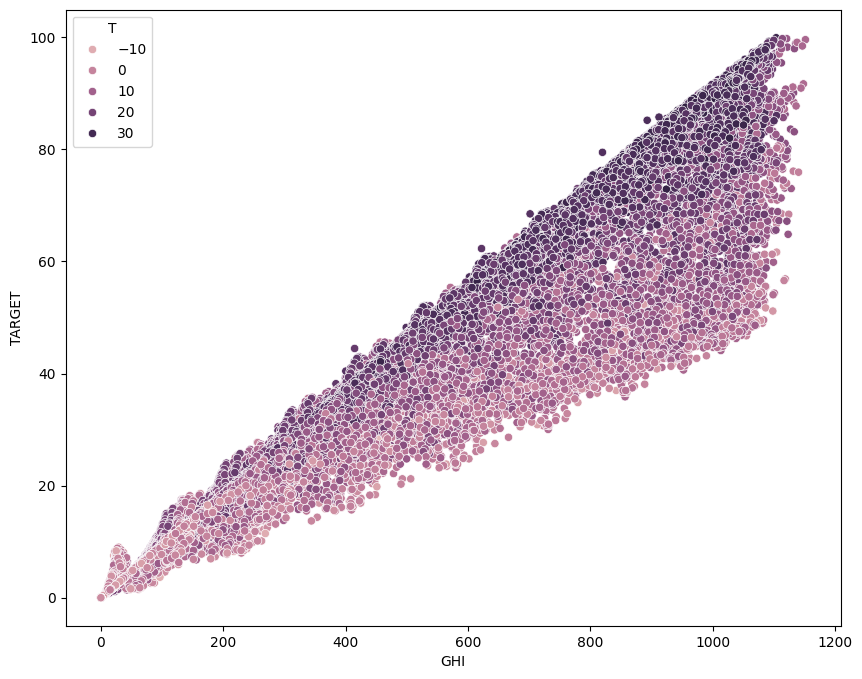

In [66]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='GHI',y='TARGET',hue='T')

In [67]:
# DNI와 DHI를 합한 데이터인 GHI가 상관성이 더 높고 GHI와 DNI, DHI 간의 상관성이 높으니 두 개의 열을 삭제
df=df.drop(['DNI','DHI'], axis=1)

<Axes: xlabel='WS', ylabel='RH'>

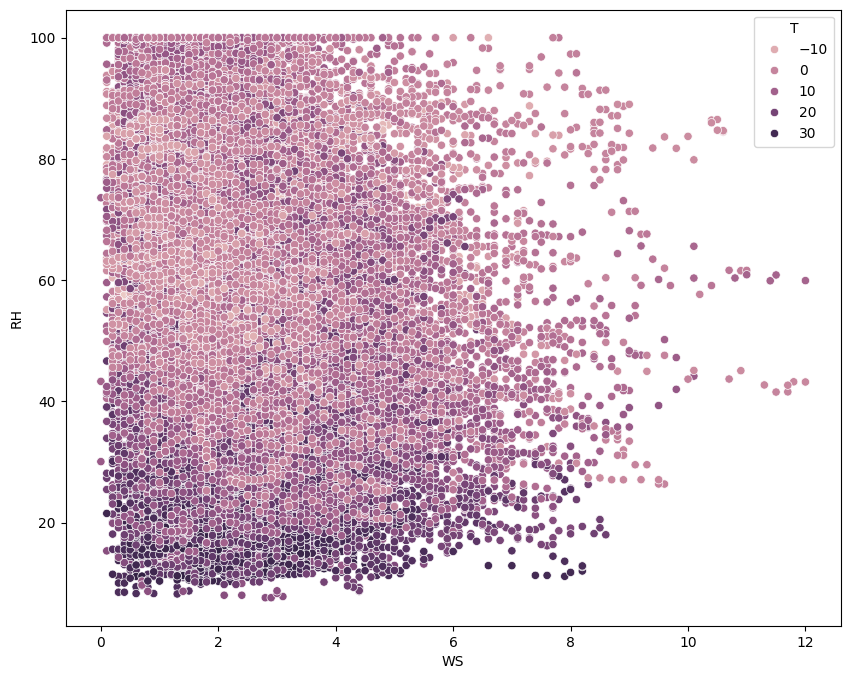

In [68]:
# hue에 따라 종류별 색깔 다르게 해서 산점도 표현
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='WS',y='RH',hue='T')
# WS 데이터는 상관성이 낮아 불필요할 것으로 판단

In [69]:
# WS열 삭제
df=df.drop(['WS'], axis=1)

In [70]:
df

,time,GHI,TARGET,RH,T,Target1,Target2
0,0.0,0.0,0.0,69.08,-12,0.0,0.0
1,0.5,0.0,0.0,69.06,-12,0.0,0.0
2,1.0,0.0,0.0,71.78,-12,0.0,0.0
3,1.5,0.0,0.0,71.75,-12,0.0,0.0
4,2.0,0.0,0.0,75.20,-12,0.0,0.0
...,...,...,...,...,...,...,...
52459,21.5,0.0,0.0,55.97,-1,0.0,0.0
52460,22.0,0.0,0.0,54.23,-2,0.0,0.0
52461,22.5,0.0,0.0,54.21,-2,0.0,0.0
52462,23.0,0.0,0.0,56.46,-2,0.0,0.0


In [71]:
from sklearn.model_selection import train_test_split
# 데이터를 훈련세트와 검증세트로 나눔
x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(df.iloc[:, :-2], df.iloc[:, -2], test_size=0.3, random_state=0)   # x : time, GHI, TARGET, RH, T, y : TARGET1
x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(df.iloc[:, :-2], df.iloc[:, -1], test_size=0.3, random_state=0)   # x : time, GHI, TARGET, RH, T, y : TARGET2

In [72]:
# 의사결정나무 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision = DecisionTreeRegressor(random_state = 42)
decision.fit(x_train_1, y_train_1)

decision_valid = decision.predict(x_valid_1)

r_squared = r2_score(y_valid_1, decision_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.6196104940802882


In [73]:
# 랜덤포레스트 모델
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 42)
forest.fit(x_train_1, y_train_1)

forest_valid = forest.predict(x_valid_1)

r_squared = r2_score(y_valid_1, forest_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.7972661198333918


In [74]:
# XGBOOST 모델
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train_1, y_train_1)

xgb_valid = xgb.predict(x_valid_1)

r_squared = r2_score(y_valid_1, xgb_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.7934060988785697


In [75]:
# 1일 후 데이터를 예측하는 모델로 R-square 값이 가장 높은 랜덤포레스트 모델 선정
pred_1 = pd.DataFrame(forest_valid, columns=['day1'])
print(pred_1)

            day1
0       0.000000
1       0.046918
2      66.765567
3       0.000000
4      17.844259
...          ...
15735  26.528946
15736  46.991817
15737   0.000000
15738   0.000000
15739  15.808974

[15740 rows x 1 columns]


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

decision = DecisionTreeRegressor(random_state = 42)
decision.fit(x_train_2, y_train_2)

decision_valid = decision.predict(x_valid_2)

r_squared = r2_score(y_valid_2, decision_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.6073868312157984


In [77]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state = 42)
forest.fit(x_train_2, y_train_2)

forest_valid = forest.predict(x_valid_2)

r_squared = r2_score(y_valid_2, forest_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.7965808969374759


In [78]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 42)
xgb.fit(x_train_2, y_train_2)

xgb_valid = xgb.predict(x_valid_2)

r_squared = r2_score(y_valid_2, xgb_valid)
print("R-squared 값:", r_squared)

R-squared 값: 0.7955646538097261


In [79]:
# 2일 후 데이터를 예측하는 모델로 R-square 값이 가장 높은 랜덤포레스트 모델 선정
pred_2 = pd.DataFrame(forest_valid, columns=['day2'])
print(pred_2)

            day2
0       0.000000
1       0.026274
2      58.566591
3       0.000000
4      19.287476
...          ...
15735  21.722034
15736  45.267436
15737   0.000000
15738   0.000000
15739  12.415610

[15740 rows x 1 columns]
